#### What’s in the Telco Customer Churn data set?

Using Customer Behavior Data to Improve Customer Retention.

This data set provides info to help you predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

A telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
%matplotlib inline

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [20]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5454,2506-TNFCO,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,69.55,Yes
5398,3936-QQFLL,Male,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,39.3,No
5364,9050-QLROH,Male,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.70,1597.25,Yes
3370,5307-UVGNB,Female,0,Yes,Yes,53,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),48.70,2495.2,No
813,3551-GAEGL,Male,0,Yes,Yes,34,No,No phone service,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),30.40,938.65,No


In [21]:
df.shape

(7043, 21)

In [22]:
pd.isnull(df).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [23]:
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [27]:
le = preprocessing.LabelEncoder()

In [28]:
le.fit(df['Churn'])
df['Y'] = le.transform(df['Churn'])

LabelEncoder()

In [30]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Y
4271,2819-GWENI,Female,0,Yes,Yes,28,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,543,No,0
3408,2108-YKQTY,Female,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Credit card (automatic),50.70,151.3,Yes,1
1553,7776-QGYJC,Female,0,Yes,Yes,39,Yes,No,Fiber optic,No,...,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),81.50,3107.3,No,0
2762,8929-KSWIH,Male,0,No,No,25,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),99.30,2513.5,No,0
125,4622-YNKIJ,Male,0,No,No,33,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,Two year,Yes,Electronic check,88.95,3027.65,No,0


In [31]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [35]:
le.inverse_transform([1,0])

C:\Users\NARENDRA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Yes', 'No'], dtype=object)

In [36]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Y'],
      dtype='object')

In [75]:
x_catg = df[['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]
x_catg1 = df[['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]
x_catg.sample()
x_catg.shape

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1798,Male,No,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic)


(7043, 15)

In [102]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce').fillna(0)
x_num = df.loc[:,['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
x_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
SeniorCitizen     7043 non-null int64
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
TotalCharges      7043 non-null float64
dtypes: float64(2), int64(2)
memory usage: 220.2 KB


In [77]:
type(x_num)
x_num.head()
x_num.shape

pandas.core.frame.DataFrame

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


(7043, 4)

In [79]:
le.fit(x_catg['gender'])
x_catg['gender'] = le.transform(x_catg['gender'])
le.fit(x_catg['Partner'])
x_catg['Partner'] = le.transform(x_catg['Partner'])
le.fit(x_catg['Dependents'])
x_catg['Dependents'] = le.transform(x_catg['Dependents'])
le.fit(x_catg['PhoneService'])
x_catg['PhoneService'] = le.transform(x_catg['PhoneService'])
le.fit(x_catg['MultipleLines'])
x_catg['MultipleLines'] = le.transform(x_catg['MultipleLines'])
le.fit(x_catg['InternetService'])
x_catg['InternetService'] = le.transform(x_catg['InternetService'])
le.fit(x_catg['OnlineSecurity'])
x_catg['OnlineSecurity'] = le.transform(x_catg['OnlineSecurity'])
le.fit(x_catg['OnlineBackup'])
x_catg['OnlineBackup'] = le.transform(x_catg['OnlineBackup'])
le.fit(x_catg['DeviceProtection'])
x_catg['DeviceProtection'] = le.transform(x_catg['DeviceProtection'])
le.fit(x_catg['TechSupport'])
x_catg['TechSupport'] = le.transform(x_catg['TechSupport'])
le.fit(x_catg['StreamingTV'])
x_catg['StreamingTV'] = le.transform(x_catg['StreamingTV'])
le.fit(x_catg['StreamingMovies'])
x_catg['StreamingMovies'] = le.transform(x_catg['StreamingMovies'])
le.fit(x_catg['Contract'])
x_catg['Contract'] = le.transform(x_catg['Contract'])
le.fit(x_catg['PaperlessBilling'])
x_catg['PaperlessBilling'] = le.transform(x_catg['PaperlessBilling'])
le.fit(x_catg['PaymentMethod'])
x_catg['PaymentMethod'] = le.transform(x_catg['PaymentMethod'])


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


LabelEncoder()

C:\Users\NARENDRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
x_catg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
gender              7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
dtypes: int64(15)
memory usage: 825.4 KB


In [81]:
x_catg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
gender              7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
dtypes: object(15)
memory usage: 825.4+ KB


In [84]:
x_num1 = pd.get_dummies(x_catg1)

In [85]:
x_num1.sample(5)

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3405,1,0,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
2295,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1992,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
6228,0,1,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
3205,1,0,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,0


In [103]:
x_le = pd.concat([x_num,x_catg],axis=1)
x_ged = pd.concat([x_num,x_num1],axis=1)

In [104]:
x_le.shape
x_ged.shape

(7043, 19)

(7043, 45)

In [90]:
y = df['Y']

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x_le,y,train_size=0.70,random_state=123)
train_x,test_x,train_y,test_y = train_test_split(x_ged,y,train_size=0.70,random_state=143)

In [106]:
x_train.shape
x_test.shape
train_x.shape
test_x.shape

(4930, 19)

(2113, 19)

(4930, 45)

(2113, 45)

In [107]:
x_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
gender              7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
dtypes: float64(2), int64(17)
memory usage: 1.0 MB


In [116]:
from sklearn.tree import DecisionTreeClassifier
dt_gi = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)
dt_en = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
dt_gi1 = DecisionTreeClassifier(criterion = 'gini',max_depth = 3)
dt_en1 = DecisionTreeClassifier(criterion = 'entropy', max_depth =3)
dt_gi.fit(x_train,y_train)
dt_en.fit(x_train,y_train)
dt_gi1.fit(train_x,train_y)
dt_en1.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [113]:
list(zip(x_train.columns,dt_gi.feature_importances_))
list(zip(x_train.columns,dt_en.feature_importances_))


[('SeniorCitizen', 0.0),
 ('tenure', 0.18981612956937496),
 ('MonthlyCharges', 0.006459189906827757),
 ('TotalCharges', 0.0),
 ('gender', 0.0),
 ('Partner', 0.0),
 ('Dependents', 0.0),
 ('PhoneService', 0.0),
 ('MultipleLines', 0.0),
 ('InternetService', 0.0),
 ('OnlineSecurity', 0.0),
 ('OnlineBackup', 0.0),
 ('DeviceProtection', 0.0),
 ('TechSupport', 0.0),
 ('StreamingTV', 0.0),
 ('StreamingMovies', 0.0),
 ('Contract', 0.1937463459118446),
 ('PaperlessBilling', 0.0),
 ('PaymentMethod', 0.01846071210908354)]

[('SeniorCitizen', 0.0),
 ('tenure', 0.1537912959400833),
 ('MonthlyCharges', 0.0),
 ('TotalCharges', 0.0),
 ('gender', 0.0),
 ('Partner', 0.0),
 ('Dependents', 0.0),
 ('PhoneService', 0.0),
 ('MultipleLines', 0.0),
 ('InternetService', 0.0),
 ('OnlineSecurity', 0.0),
 ('OnlineBackup', 0.0),
 ('DeviceProtection', 0.0),
 ('TechSupport', 0.0),
 ('StreamingTV', 0.0),
 ('StreamingMovies', 0.0),
 ('Contract', 0.19454642884150017),
 ('PaperlessBilling', 0.0),
 ('PaymentMethod', 0.0)]

In [117]:
list(zip(train_x.columns,dt_gi1.feature_importances_))
list(zip(train_x.columns,dt_en1.feature_importances_))

[('SeniorCitizen', 0.0),
 ('tenure', 0.18981612956937496),
 ('MonthlyCharges', 0.006459189906827757),
 ('TotalCharges', 0.0),
 ('gender_Female', 0.0),
 ('gender_Male', 0.0),
 ('Partner_No', 0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_No', 0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_No', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('InternetService_DSL', 0.0),
 ('InternetService_Fiber optic', 0.1937463459118446),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No', 0.01846071210908354),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No', 0.0),
 ('Strea

[('SeniorCitizen', 0.0),
 ('tenure', 0.1537912959400833),
 ('MonthlyCharges', 0.0),
 ('TotalCharges', 0.0),
 ('gender_Female', 0.0),
 ('gender_Male', 0.0),
 ('Partner_No', 0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_No', 0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_No', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('InternetService_DSL', 0.0),
 ('InternetService_Fiber optic', 0.19454642884150017),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No', 0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No', 0.0),
 ('StreamingTV_No internet service', 0.0)

In [118]:
y_pred_gini = dt_gi.predict(x_test)
y_pred_gini1 = dt_gi1.predict(test_x)
y_pred_entropy = dt_en.predict(x_test)
y_pred_entropy1 = dt_en1.predict(test_x)

In [120]:
auc_gi = metrics.roc_auc_score(y_test,y_pred_gini)
auc_gi1 = metrics.roc_auc_score(y_test,y_pred_gini1)
auc_en = metrics.roc_auc_score(test_y,y_pred_entropy)
auc_en1 = metrics.roc_auc_score(test_y,y_pred_entropy1)
auc_gi
auc_gi1
auc_en
auc_en1

0.6245529007200329

0.4997546101027187

0.5126811999964163

0.6427353136171012

### Dummy coding with get_dummies function and entropy is giving High Area Under Curve Score Compared with Dummy coding with Preprocessing LabelEncoder() function.

In [126]:
from sklearn import tree
import graphviz

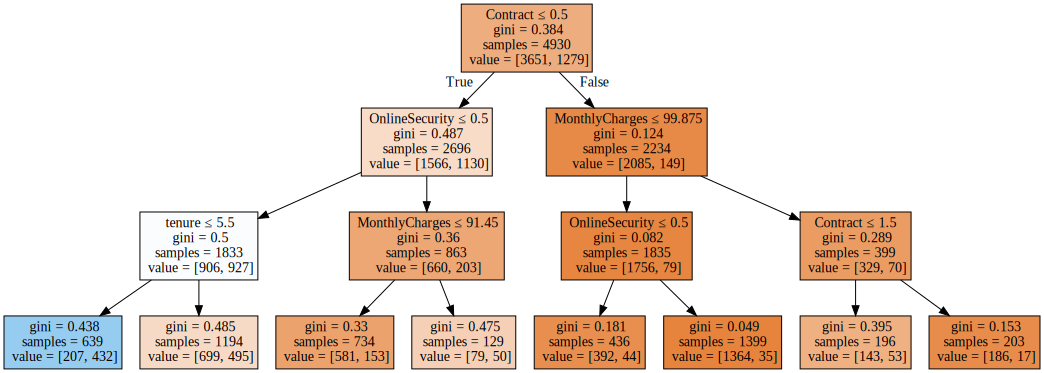

In [127]:
dot_data = tree.export_graphviz(dt_gi,out_file=None,feature_names=x_train.columns,filled=True,special_characters=True,)
graph = graphviz.Source(dot_data)
graph

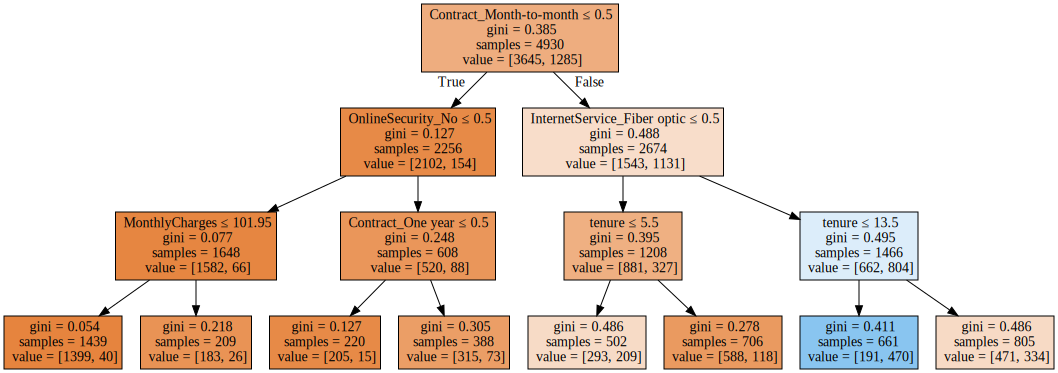

In [129]:
dot_data = tree.export_graphviz(dt_gi1,out_file=None,feature_names=train_x.columns,filled=True,special_characters=True,)
graph = graphviz.Source(dot_data)
graph

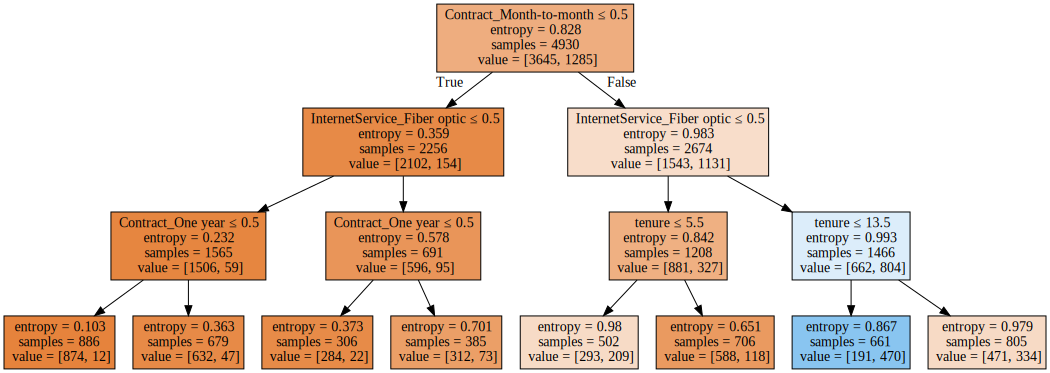

In [130]:
dot_data = tree.export_graphviz(dt_en1,out_file=None,feature_names=train_x.columns,filled=True,special_characters=True,)
graph = graphviz.Source(dot_data)
graph

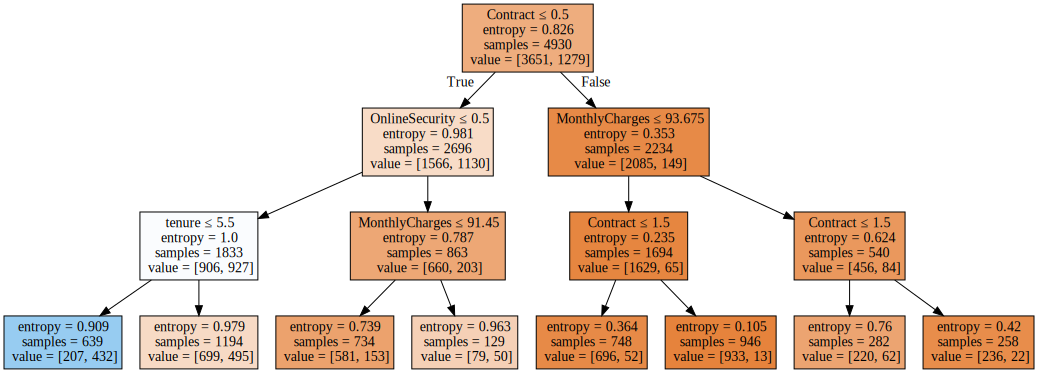

In [131]:
dot_data = tree.export_graphviz(dt_en,out_file=None,feature_names=x_train.columns,filled=True,special_characters=True,)
graph = graphviz.Source(dot_data)
graph

In [132]:
print("Accuracy Score:")
metrics.accuracy_score(y_test,y_pred_gini)
metrics.accuracy_score(y_test,y_pred_gini1)
metrics.accuracy_score(test_y,y_pred_entropy)
metrics.accuracy_score(test_y,y_pred_entropy1)

Accuracy Score:


0.763369616658779

0.6583057264552769

0.6753431140558448

0.7747278750591576

In [135]:
print("Precission and Recall Score:")
print(metrics.classification_report(y_test,y_pred_gini))
print(metrics.classification_report(y_test,y_pred_gini1))
print(metrics.classification_report(test_y,y_pred_entropy))
print(metrics.classification_report(test_y,y_pred_entropy1))

Precission and Recall Score:
             precision    recall  f1-score   support

          0       0.78      0.94      0.85      1523
          1       0.66      0.31      0.42       590

avg / total       0.75      0.76      0.73      2113

             precision    recall  f1-score   support

          0       0.72      0.86      0.78      1523
          1       0.28      0.14      0.19       590

avg / total       0.60      0.66      0.62      2113

             precision    recall  f1-score   support

          0       0.73      0.88      0.80      1529
          1       0.32      0.15      0.20       584

avg / total       0.61      0.68      0.63      2113

             precision    recall  f1-score   support

          0       0.79      0.94      0.86      1529
          1       0.68      0.35      0.46       584

avg / total       0.76      0.77      0.75      2113



In [137]:
fpr,tpr,th = metrics.roc_curve(y_test,y_pred_gini)
fpr1,tpr1,th1 = metrics.roc_curve(y_test,y_pred_gini1)
fpr2,tpr2,th2 = metrics.roc_curve(test_y,y_pred_entropy)
fpr3,tpr3,th3 = metrics.roc_curve(test_y,y_pred_entropy1)
roc_auc = metrics.auc(fpr,tpr)
roc_auc1 = metrics.auc(fpr1,tpr1)
roc_auc2 = metrics.auc(fpr2,tpr2)
roc_auc3 = metrics.auc(fpr3,tpr3)

ROCR Chart


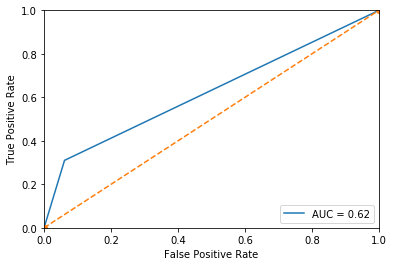

In [138]:
print("ROCR Chart")
plt.plot(fpr,tpr,label = 'AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

ROCR Chart


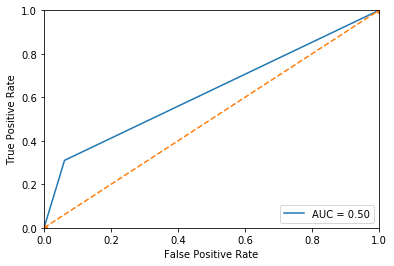

In [139]:
print("ROCR Chart")
plt.plot(fpr,tpr,label = 'AUC = %0.2f'%roc_auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

ROCR Chart


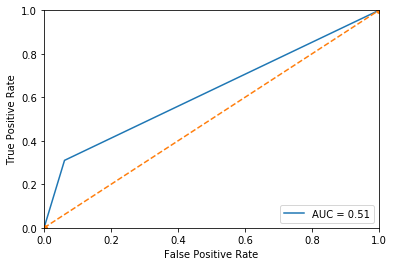

In [140]:
print("ROCR Chart")
plt.plot(fpr,tpr,label = 'AUC = %0.2f'%roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

ROCR Chart


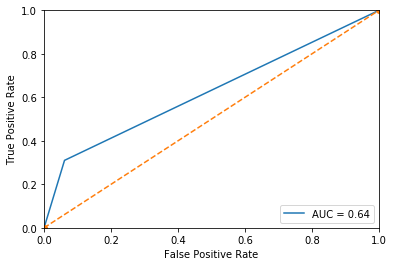

In [141]:
print("ROCR Chart")
plt.plot(fpr,tpr,label = 'AUC = %0.2f'%roc_auc3)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [143]:
cf = metrics.confusion_matrix(y_test,y_pred_gini)
cf1 = metrics.confusion_matrix(y_test,y_pred_gini1)
cf2 = metrics.confusion_matrix(test_y,y_pred_entropy)
cf3 = metrics.confusion_matrix(test_y,y_pred_entropy1)
lb1 = ['Predicted 0','Predicted 1']
lb2 = ['True 0','True 1']

In [150]:
y_test.value_counts()
cf

0    1523
1     590
Name: Y, dtype: int64

array([[1430,   93],
       [ 407,  183]], dtype=int64)

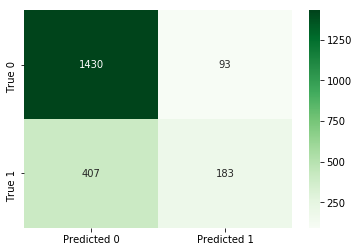

In [155]:
sns.heatmap(cf,annot=True,cmap='Greens',fmt='d',xticklabels=lb1,yticklabels=lb2);

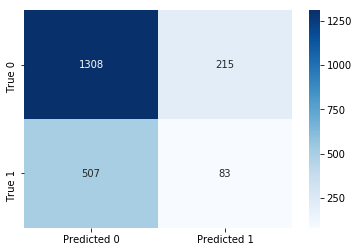

In [156]:
cf1
sns.heatmap(cf1,annot=True,fmt='d',cmap='Blues',xticklabels=lb1,yticklabels=lb2);

array([[1340,  189],
       [ 497,   87]], dtype=int64)

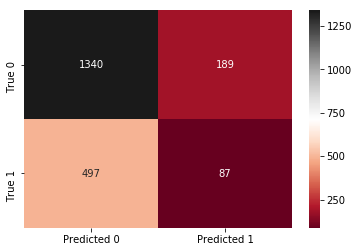

In [158]:
cf2
sns.heatmap(cf2,annot=True,fmt='d',cmap='RdGy',xticklabels=lb1,yticklabels=lb2)

array([[1434,   95],
       [ 381,  203]], dtype=int64)

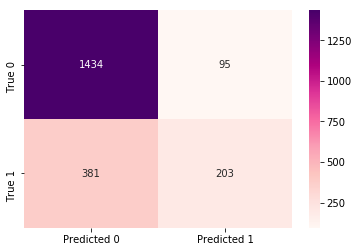

In [161]:
cf3
sns.heatmap(cf3,annot=True,fmt='d',cmap='RdPu',xticklabels=lb1,yticklabels=lb2)